In [72]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [ ]:
# Load and preprocess the image
image = Image.open('1.png').convert('RGB')  

# Convert image to numpy array and normalize
img_data = np.array(image) / 255.0

# Reshape the data to 2D array where each row is a pixel (R,G,B values)
pixels = img_data.reshape(-1, 3)

Image shape: (662, 667, 3)


In [ ]:
# Initialize the SOM with adjusted parameters
som_size = 30  
som = MiniSom(x=som_size, y=som_size, 
              input_len=3,
              sigma=2.0,
              learning_rate=0.1,
              neighborhood_function='gaussian')

# Train the SOM with the image pixels
som.random_weights_init(pixels)
som.train_random(pixels, num_iteration=10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07851133433210074


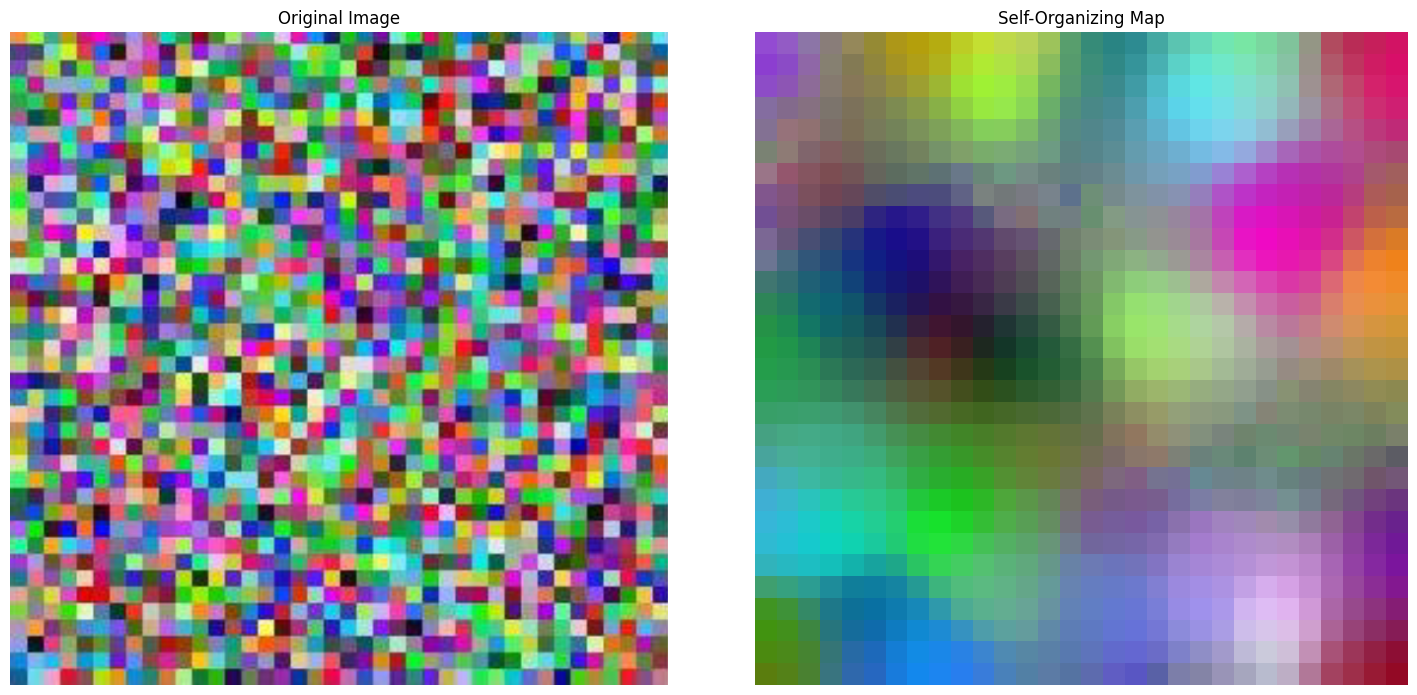

In [75]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Display original image
ax1.imshow(img_data)
ax1.set_title('Original Image')
ax1.axis('off')

# Display SOM visualization
weights = som.get_weights()
ax2.imshow(weights)
ax2.set_title('Self-Organizing Map')
ax2.axis('off')

plt.tight_layout()
plt.show()